#Download Dataset yang dibutuhkan.

application_train.csv: File ini berisi data pelatihan (train) yang mencakup kolom "TARGET". Kolom "TARGET" ini kemungkinan besar adalah variabel yang ingin Anda prediksi, yaitu apakah pinjaman tersebut disetujui atau tidak (misalnya, 1 untuk disetujui, 0 untuk tidak disetujui).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

#Pahami deskripsi kolom yang tersedia

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dataset/application_train.csv')
print(df.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#Lakukan penggalian informasi terkait kondisi data awal.

In [5]:
# Melihat distribusi dari target
print("\nDistribusi target:")
print(df['TARGET'].value_counts())

# Memilih beberapa fitur kunci untuk dianalisis distribusinya
fitur_kunci = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL']

# Melihat distribusi dari fitur kunci
for fitur in fitur_kunci:
    print("\nDistribusi untuk fitur:", fitur)
    print(df[fitur].value_counts())


Distribusi target:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Distribusi untuk fitur: NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

Distribusi untuk fitur: CODE_GENDER
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Distribusi untuk fitur: FLAG_OWN_CAR
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

Distribusi untuk fitur: FLAG_OWN_REALTY
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

Distribusi untuk fitur: AMT_INCOME_TOTAL
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64


# Lakukan proses Data Cleaning dan Data Processing.

In [6]:
# Menghitung jumlah nilai yang hilang untuk setiap fitur
missing_values = df.isnull().sum()

In [7]:
# Penanganan missing value untuk fitur numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean') # atau median, atau most_frequent
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Penanganan missing value untuk fitur kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent') # atau constant, dengan fill_value='nilai_konstan'
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Kode kategori
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [8]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,0,1,0,1,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003.0,0.0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004.0,0.0,1,1,1,1,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006.0,0.0,0,0,0,1,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007.0,0.0,0,1,0,1,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0,1,0,0,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307507,456252.0,0.0,0,0,0,1,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307508,456253.0,0.0,0,0,0,1,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,1.000000,0.000,0.000000,1.000000,0.000000,1.000000
307509,456254.0,1.0,0,0,0,1,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


#Penggalian Insight Mengacu kepada Objective yang Sudah Ditetapkan

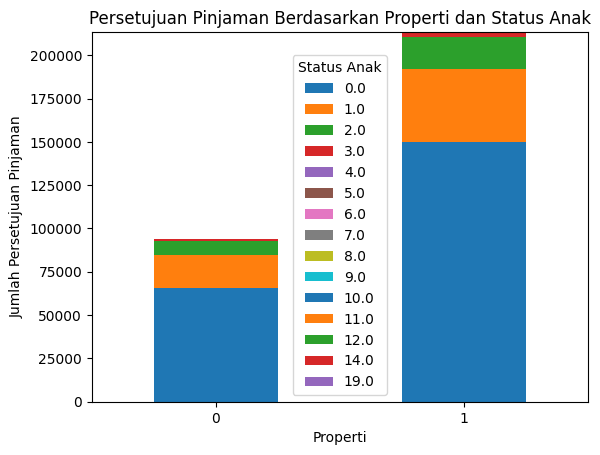

In [9]:
# Menghitung jumlah persetujuan pinjaman berdasarkan properti dan status anak
approval_counts = df.groupby(['FLAG_OWN_REALTY', 'CNT_CHILDREN']).size().unstack()

# Membuat diagram batang
approval_counts.plot(kind='bar', stacked=True)
plt.title('Persetujuan Pinjaman Berdasarkan Properti dan Status Anak')
plt.xlabel('Properti')
plt.ylabel('Jumlah Persetujuan Pinjaman')
plt.xticks(rotation=0)  # Untuk memutar label sumbu x jika perlu
plt.legend(title='Status Anak')
plt.show()

#Lakukan pemodelan dengan berbagai macam metode

In [10]:
# Memisahkan fitur dan target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [11]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [23]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [24]:
# Membuat prediksi
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Logistic Regression:", accuracy)

# Matriks kebingungan (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Laporan Klasifikasi (Classification Report)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Akurasi Logistic Regression: 0.9191421556672033

Confusion Matrix:
[[56487    67]
 [ 4906    43]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.39      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.66      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [17]:
# compute accuracy of the model
knn.score(X_test, y_test)

0.9189633026031251

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[56515,    39],
       [ 4945,     4]])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56554
         1.0       0.09      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.51      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503

